In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
class Model:

    def b(X, t):
        pass

    def sigma(X, t):
        pass

    def h(X, Y, Z, t):
        pass

class HJB(Model):

    def b(X, t):
        return np.zeros(X.shape)

    def sigma(X, t):
        return np.sqrt(2) * np.eye(X.shape[0])

    def h(X, Y, Z, t):
        return -1/2 * np.sum(Z * Z, axis=0)

In [45]:
def next_price(X_n, dt, model):
    # From a batch of asset prices at time n, compute the price at time n+1
    eta = np.random.normal(0, 1, size=X_n.shape)
    return X_n + model.b(X_n, dt) * np.sqrt(dt) + np.dot(model.sigma(X_n, dt), eta) * np.sqrt(dt)

def asset_path(X_init, dt, T, model, num_batches):
    N = int(T / dt)
    num_assets = X_init.shape[1]
    X = np.zeros((N + 1, num_batches, num_assets))
    X[0] = X_init

    for n in range(N):
        X[n + 1] = next_price(X[n], dt, model)

    return X

num_assets = 2
num_batches = 3000
X_init = np.ones((num_batches, num_assets))
dt = 0.01
T = 1
X = asset_path(X_init, dt, T, HJB, num_batches)

print(X.shape)

(101, 3000, 2)


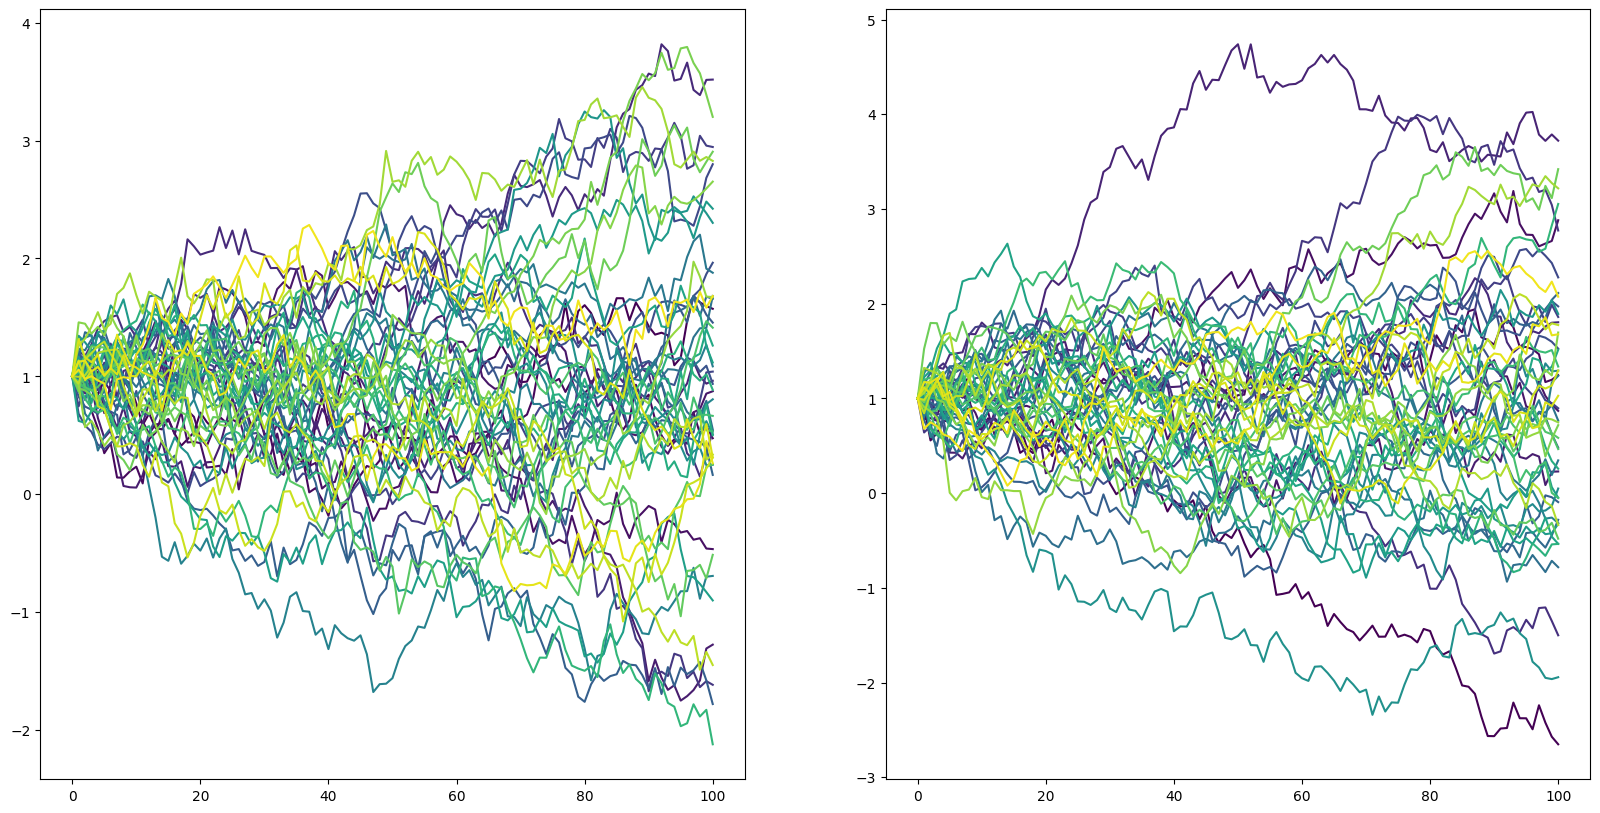

In [53]:
plt.figure(figsize=(20, 10))
colormap = plt.cm.viridis

n_trajecs = 50
plt.subplot(1, 2, 1)
for i in range(n_trajecs): plt.plot(X[:, i, 0], color=colormap(i / n_trajecs))

plt.subplot(1, 2, 2)
for i in range(n_trajecs): plt.plot(X[:, i, 1], color=colormap(i / n_trajecs))

In [ ]:
def derivative_path(X, dt, T, model):
    N = int(T / dt)
    num_assets = X.shape[2]
    num_batches = X.shape[1]
    Y = np.zeros((N + 1, num_batches, num_assets))
    Z = np.zeros((N + 1, num_batches, num_assets, num_assets))
    Y[N] = model.h(X[N], Y[N], np.zeros((num_assets, num_assets)), N)
    Z[N] = np.zeros((num_assets, num_assets))

    for n in range(N - 1, -1, -1):
        Y[n] = Y[n + 1] - model.h(X[n], Y[n], np.zeros((num_assets, num_assets)), n) * dt

    return Y